In [163]:
%matplotlib inline 
import pandas as pd 
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt 
import matplotlib 
import datetime 
import seaborn as sns
import re

In [113]:
url = "https://raw.githubusercontent.com/umaimehm/Intro_to_AI_2021/main/assignment1/Ruter_data.csv"
df = pd.read_csv(url, sep=';')
df

,TurId,Dato,Fylke,Område,Kommune,Holdeplass_Fra,Holdeplass_Til,Linjetype,Linjefylke,Linjenavn,Linjeretning,Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra,Tidspunkt_Faktisk_Avgang_Holdeplass_Fra,Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra,Tidspunkt_Planlagt_Avgang_Holdeplass_Fra,Kjøretøy_Kapasitet,Passasjerer_Ombord
0,15006-2020-08-10T10:24:00+02:00,10/08/2020,Viken,Vest,Bærum,Nordliveien,Tjernsmyr,Lokal,Viken,150,0,10:53:53,10:53:59,10:53:00,10:53:00,112,5
1,15002-2020-08-15T12:54:00+02:00,15/08/2020,Viken,Vest,Bærum,Nadderud stadion,Bekkestua bussterminal (Plattform C),Lokal,Viken,150,0,13:12:20,13:12:26,13:12:00,13:12:00,112,5
2,15004-2020-08-03T09:54:00+02:00,03/08/2020,Viken,Vest,Bærum,Ringstabekkveien,Skallum,Lokal,Viken,150,0,10:18:56,10:19:21,10:19:00,10:19:00,112,6
3,15003-2020-07-27T13:00:00+02:00,27/07/2020,Viken,Vest,Bærum,Gruvemyra,Gullhaug,Lokal,Viken,150,1,13:52:04,13:52:26,13:51:00,13:51:00,112,10
4,15002-2020-08-27T07:15:00+02:00,27/08/2020,Viken,Vest,Bærum,Lysaker stasjon (Plattform A),Tjernsmyr,Lokal,Viken,150,1,07:34:13,07:34:53,07:33:00,07:33:00,112,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,10001-2020-06-10T15:10:00+02:00,10/06/2020,Viken,Nordøst,Lillestrøm,Brauterkrysset,Nordsnoveien,Lokal,Viken,100,1,16:23:18,16:23:48,16:10:00,16:10:00,151,2
5996,10010-2020-06-23T05:54:00+02:00,23/06/2020,Viken,Nordøst,Lillestrøm,Vestbygata,Bjørnsons gate,Lokal,Viken,100,0,06:00:32,06:00:40,05:59:00,05:59:00,151,2
5997,2007-2020-06-11T17:22:00+02:00,11/06/2020,Oslo,Indre By,Sagene,Torshovparken (mot Torshovparken),Torshov (mot Bentsebrua),Lokal,Oslo,20,1,17:42:43,17:43:10,17:32:00,17:32:00,106,3
5998,10004-2020-08-13T04:59:00+02:00,13/08/2020,Oslo,Indre By,Gamle Oslo,Harald Hårdrådes plass (mot Grønland),Oslo gate (mot Grønland),Lokal,Viken,100,0,06:00:11,06:00:23,05:59:00,05:59:00,151,5


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 17 columns):
 #   Column                                     Non-Null Count  Dtype 
---  ------                                     --------------  ----- 
 0   TurId                                      6000 non-null   object
 1   Dato                                       6000 non-null   object
 2   Fylke                                      6000 non-null   object
 3   Område                                     6000 non-null   object
 4   Kommune                                    6000 non-null   object
 5   Holdeplass_Fra                             6000 non-null   object
 6   Holdeplass_Til                             6000 non-null   object
 7   Linjetype                                  6000 non-null   object
 8   Linjefylke                                 6000 non-null   object
 9   Linjenavn                                  6000 non-null   object
 10  Linjeretning                        

In [ ]:
#Feature 1
#get time-start from tour id

#Feature 2
#get time difference from actual and planned arrival

#Feature 3 
#get time difference from actual and planned departure

#Feature 4
#get current capacity

#Feature 5 
#get travel journey (from - to) in one column

In [11]:
df.isna().sum()

TurId                                        0
Dato                                         0
Fylke                                        0
Område                                       0
Kommune                                      0
Holdeplass_Fra                               0
Holdeplass_Til                               0
Linjetype                                    0
Linjefylke                                   0
Linjenavn                                    0
Linjeretning                                 0
Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra     0
Tidspunkt_Faktisk_Avgang_Holdeplass_Fra      0
Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra    0
Tidspunkt_Planlagt_Avgang_Holdeplass_Fra     0
Kjøretøy_Kapasitet                           0
Passasjerer_Ombord                           0
dtype: int64

In [140]:
# Feature 1
df['Tur start'] = df.TurId.apply(lambda x: re.search('(\d{2}:\d{2}:\d{2})', x).group(1))
df[['Linjenavn','Tur start']]

,Linjenavn,Tur start
0,150,10:24:00
1,150,12:54:00
2,150,09:54:00
3,150,13:00:00
4,150,07:15:00
...,...,...
5995,100,15:10:00
5996,100,05:54:00
5997,20,17:22:00
5998,100,04:59:00


In [141]:
#Finner ikke ut hvordan bytte 24 til 00 
#df['Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra'].replace(r'24', '00', regex=True)
#df['Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra'].replace(r'25', '01', regex=True)
#pd.to_datetime(df['Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra'])

In [135]:
#Feature 4
df['Kjøretøy_restplass'] = df['Kjøretøy_Kapasitet'] - df['Passasjerer_Ombord']

In [143]:
df[['Kjøretøy_Kapasitet','Kjøretøy_restplass']]

,Kjøretøy_Kapasitet,Kjøretøy_restplass
0,112,107
1,112,107
2,112,106
3,112,102
4,112,102
...,...,...
5995,151,149
5996,151,149
5997,106,103
5998,151,146


In [149]:
#Feature 5
df['Reisetur'] = df['Holdeplass_Fra'] + "-" + df['Holdeplass_Til']
df[['Tur start', 'Reisetur']]

,Tur start,Reisetur
0,10:24:00,Nordliveien-Tjernsmyr
1,12:54:00,Nadderud stadion-Bekkestua bussterminal (Platt...
2,09:54:00,Ringstabekkveien-Skallum
3,13:00:00,Gruvemyra-Gullhaug
4,07:15:00,Lysaker stasjon (Plattform A)-Tjernsmyr
...,...,...
5995,15:10:00,Brauterkrysset-Nordsnoveien
5996,05:54:00,Vestbygata-Bjørnsons gate
5997,17:22:00,Torshovparken (mot Torshovparken)-Torshov (m...
5998,04:59:00,Harald Hårdrådes plass (mot Grønland)-Oslo ga...


<AxesSubplot:xlabel='Tur start'>

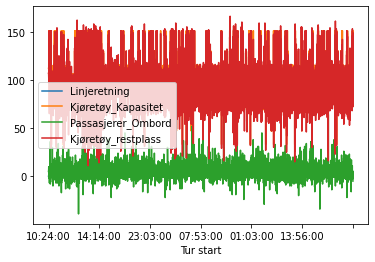

In [155]:
#Feature 1
df.plot(x='Tur start')


In [164]:
#df.plot(x='Kjøretøy_Kapasitet', y='Tur start)
time = matplotlib.dates.date2num(df['Tur start'])
plt.plot_date(time, x=df['Kjøretøy_Kapasitet'])

ValueError: Error parsing datetime string "10:24:00" at position 2